In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn import set_config

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import time
from tqdm import tqdm
from sklearn import set_config
from sklearn.utils import estimator_html_repr
from IPython.display import display, HTML


In [14]:
# Decision Tree Classifier
def decision_tree(X_train, y_train):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

# K-Nearest Neighbors Classifier
def knn(X_train, y_train, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    return model

# Logistic Regression Classifier
def logistic_regression(X_train, y_train, max_iter=100):
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    return model

# Multilayer Perceptron Classifier
def mlp(X_train, y_train, learning_rate=0.001, loss='binary_crossentropy',
        metrics=None, epochs=100, batch_size=32, validation_split=0.2):
    if metrics is None:
        metrics = ['accuracy']
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Specify input dimension dynamically
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # or 'softmax' for multi-class
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=loss,
                  metrics=metrics)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return model

# Random Forest Classifier
def random_forest(X_train, y_train, n_estimators=100):
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    return model

# Support Vector Machine Classifier
def svm(X_train, y_train, kernel='rbf', probability=True):
    model = SVC(kernel=kernel, probability=probability)
    model.fit(X_train, y_train)
    return model


In [15]:
# Custom transformers
class ColumnDeleter(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_delete=None):
        self.columns_to_delete = columns_to_delete

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_delete)

class ColumnBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name=None, positive_class=None):
        self.column_name = column_name
        self.positive_class = positive_class

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            if self.column_name not in X.columns:
                raise ValueError(f"The column '{self.column_name}' is not in the DataFrame.")
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.copy()
            X[self.column_name] = (X[self.column_name] == self.positive_class).astype(int)
        elif isinstance(X, np.ndarray):
            # Assuming column index is known, example index 0
            col_index = 0  # You'll need to adjust this index based on your actual data
            X[:, col_index] = (X[:, col_index] == self.positive_class).astype(int)
        else:
            raise TypeError("Input X must be a pandas DataFrame or a numpy array.")
        return X

In [16]:
# Custom transformers from the previous code snippets are assumed to be already defined

# Create a preprocessing pipeline
def create_preprocessing_pipeline():
    return Pipeline([
        ('deleter', ColumnDeleter(columns_to_delete=['Unnamed: 0', 'Source', 'pscol'])),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('binarizer', ColumnBinarizer(column_name='SpType-ELS', positive_class='some_positive_class')),
        ('selector', SelectKBest(score_func=f_classif, k=10))
    ])

# Model list
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Function to evaluate and plot ROC
def plot_roc_curve(y_true, y_scores, model_name, pos_label):
    # This ensures you are using the correct positive label for calculating the ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores[:, 1], pos_label=pos_label)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to evaluate model
def evaluate_model(y_test, predictions, probabilities, model_name):
    unique_labels = np.unique(y_test)  # Identify unique labels dynamically
    pos_label = unique_labels[1]  # Adjust based on your knowledge of which label is positive
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    # Use the actual positive label
    print(f"Precision: {precision_score(y_test, predictions, pos_label=pos_label)}")
    print(f"Recall: {recall_score(y_test, predictions, pos_label=pos_label)}")
    print(f"F1 Score: {f1_score(y_test, predictions, pos_label=pos_label)}")
    if probabilities is not None:
        # Determine which label index corresponds to 'B' or the positive class you are interested in
        pos_label = 'B      '.strip()  # Adjust based on the actual positive class
        plot_roc_curve(y_test, probabilities, model_name, pos_label=pos_label)
    plot_confusion_matrix(y_test, predictions, model_name)

def display_pipeline(pipeline):
    set_config(display='diagram')  # Set display configuration to 'diagram'
    display(pipeline)  # This will render the pipeline as an HTML diagram in Jupyter Notebook


# Main function to run pipeline
def create_full_pipeline_with_model(preprocessing_pipeline, model):
    # Combine the preprocessing pipeline with a model into a full pipeline
    return Pipeline(steps=[
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ])

def run_pipeline(data_path):
    df = pd.read_csv(data_path)
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Trimming spaces if string
    y = df['SpType-ELS']
    X = df.drop(columns=['SpType-ELS'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    preprocessing_pipeline = create_preprocessing_pipeline()

    for name, model in models.items():
        full_pipeline = create_full_pipeline_with_model(preprocessing_pipeline, model)
        full_pipeline.fit(X_train, y_train)
        predictions = full_pipeline.predict(X_test)
        probabilities = full_pipeline.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
        evaluate_model(y_test, predictions, probabilities, name)
        display_pipeline(full_pipeline)  # Display the full pipeline after fitting

/var/folders/ck/vgxn_9f907d122j56f3203gm0000gn/T/ipykernel_71855/2052752595.py:83: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Trimming spaces if string
/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Evaluation Metrics for Decision Tree:
Accuracy: 0.9934361114851219
Precision: 0.993261554237164
Recall: 0.9924619437939111
F1 Score: 0.9928615880221108


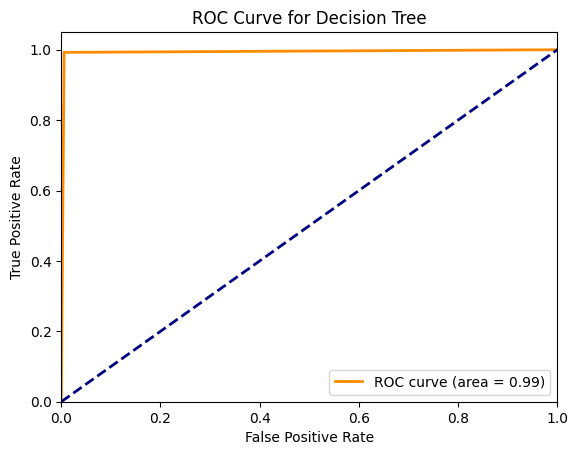

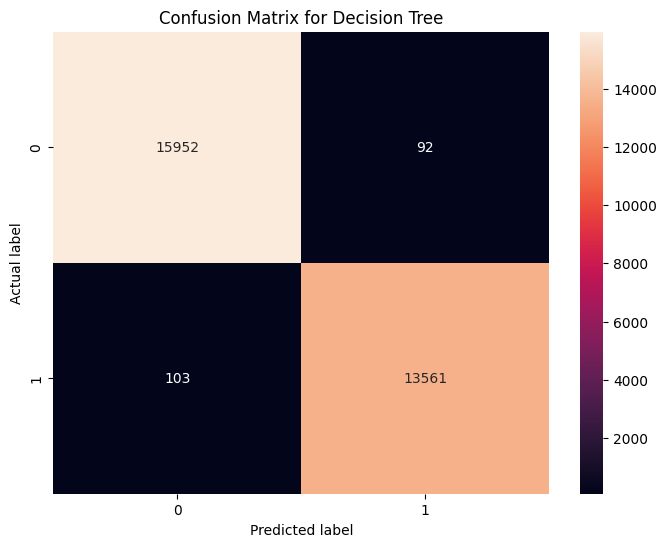

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('deleter',
                                  ColumnDeleter(columns_to_delete=['Unnamed: 0',
                                                                   'Source',
                                                                   'pscol'])),
                                 ('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler()),
                                 ('binarizer',
                                  ColumnBinarizer(column_name='SpType-ELS',
                                                  positive_class='some_positive_class')),
                                 ('selector', SelectKBest())])),
                ('model', DecisionTreeClassifier())])

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.9927628921502626
Precision: 0.9921686306082119
Recall: 0.992096018735363
F1 Score: 0.9921323233432137


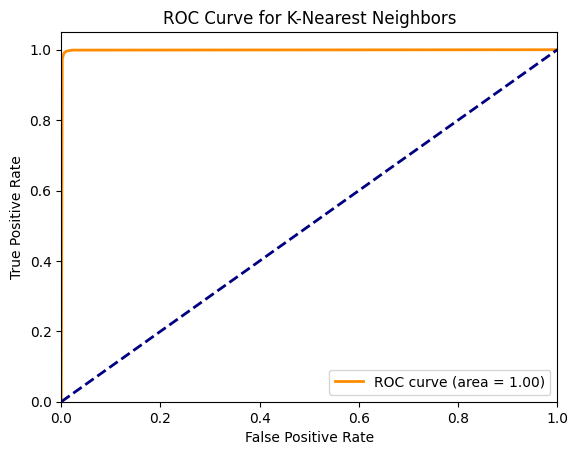

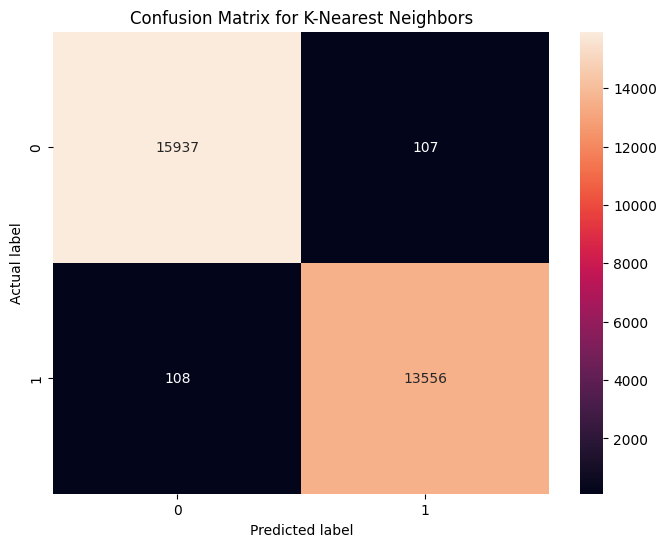

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('deleter',
                                  ColumnDeleter(columns_to_delete=['Unnamed: 0',
                                                                   'Source',
                                                                   'pscol'])),
                                 ('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler()),
                                 ('binarizer',
                                  ColumnBinarizer(column_name='SpType-ELS',
                                                  positive_class='some_positive_class')),
                                 ('selector', SelectKBest())])),
                ('model', KNeighborsClassifier())])

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Evaluation Metrics for Logistic Regression:
Accuracy: 0.9922243166823751
Precision: 0.99194316267487
Recall: 0.9911446135831382
F1 Score: 0.9915437273492697


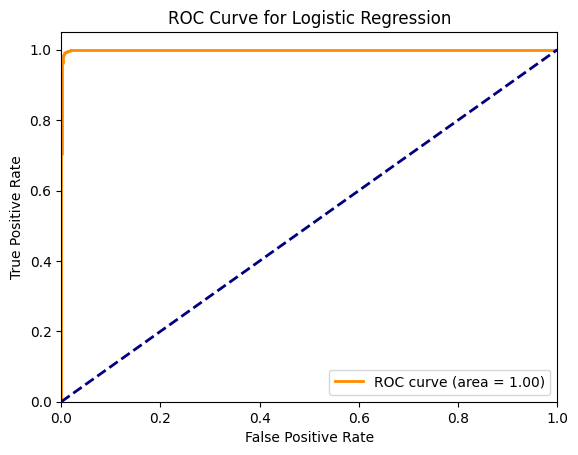

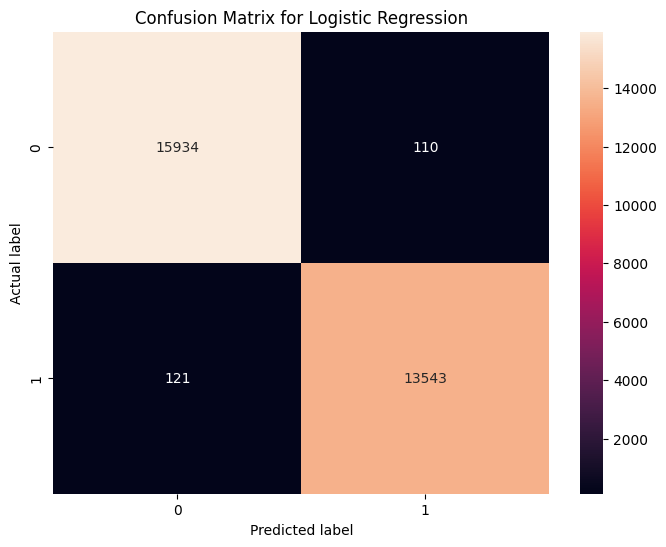

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('deleter',
                                  ColumnDeleter(columns_to_delete=['Unnamed: 0',
                                                                   'Source',
                                                                   'pscol'])),
                                 ('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler()),
                                 ('binarizer',
                                  ColumnBinarizer(column_name='SpType-ELS',
                                                  positive_class='some_positive_class')),
                                 ('selector', SelectKBest())])),
                ('model', LogisticRegression())])

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Evaluation Metrics for Random Forest:
Accuracy: 0.9960280059243302
Precision: 0.9943074003795066
Recall: 0.997072599531616
F1 Score: 0.9956880800993934


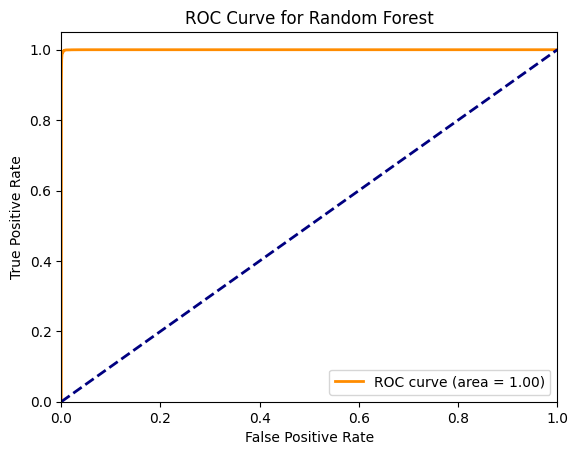

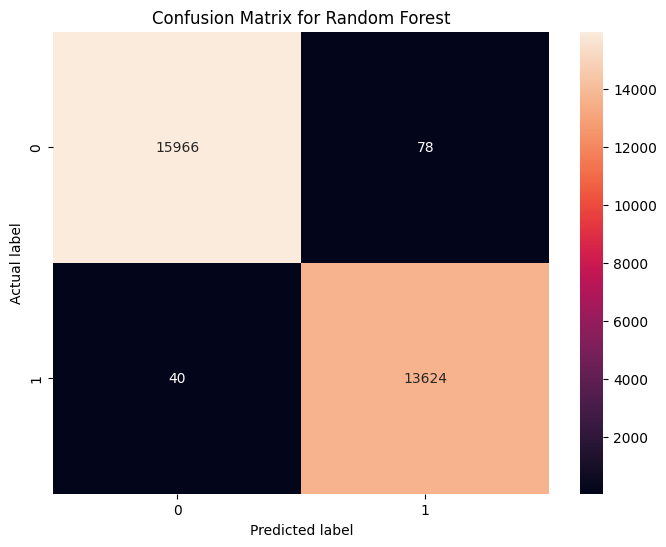

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('deleter',
                                  ColumnDeleter(columns_to_delete=['Unnamed: 0',
                                                                   'Source',
                                                                   'pscol'])),
                                 ('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler()),
                                 ('binarizer',
                                  ColumnBinarizer(column_name='SpType-ELS',
                                                  positive_class='some_positive_class')),
                                 ('selector', SelectKBest())])),
                ('model', RandomForestClassifier())])

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Evaluation Metrics for SVM:
Accuracy: 0.9949171940218123
Precision: 0.9938600979460566
Recall: 0.9950966042154566
F1 Score: 0.9944779667215213


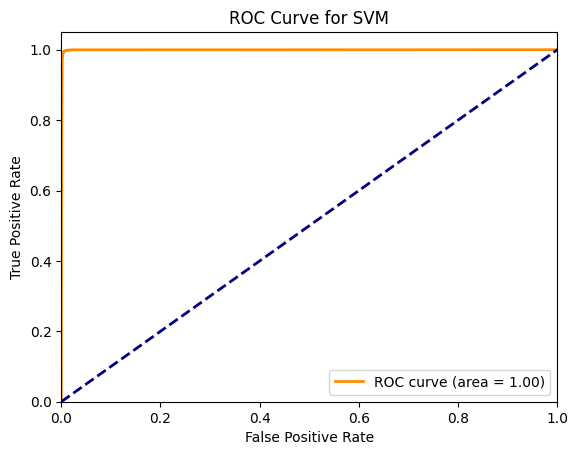

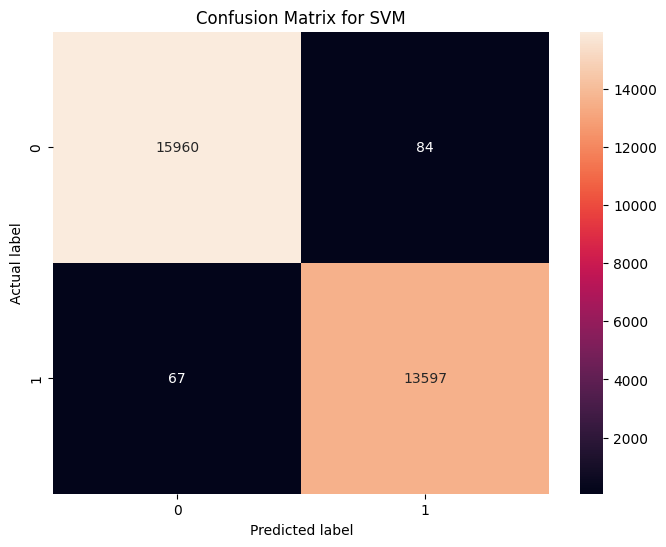

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('deleter',
                                  ColumnDeleter(columns_to_delete=['Unnamed: 0',
                                                                   'Source',
                                                                   'pscol'])),
                                 ('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler()),
                                 ('binarizer',
                                  ColumnBinarizer(column_name='SpType-ELS',
                                                  positive_class='some_positive_class')),
                                 ('selector', SelectKBest())])),
                ('model', SVC(probability=True))])

In [17]:
run_pipeline('./data/dataGaia_AB_train.csv')